## Python Week 6: Sci-kit learn

For this week we will be looking at sci-kit learn. A library dedicated to fairly sophisticated
data-analysis and machine learning. This is a really expansive library, so as always, this is
really just the tip of the iceberg. We will look at how we can preprocess data, some dimensionality
reduction, classification, linear/non-linear models, and pipelines.


In [265]:
# import sci-kit learn, sk is my go to abbrev.
import sklearn as sk
import sklearn.impute as imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

For part one, we will look at how we can develop a machine learning model for our mouse-protein dataset.

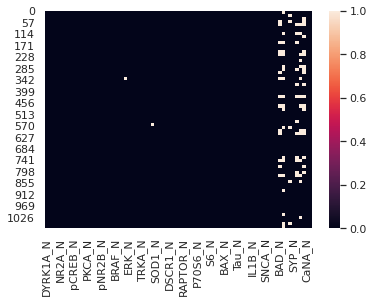

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn


In [266]:
# import our favorite dataset
mp = pd.read_csv('Data_Cortex_Nuclear.csv')
classes = mp.iloc[:, -1]
mp = mp.iloc[:, 1:79]
plt.show(sb.heatmap(mp.isnull()))
mp

In [267]:
# in our last column we have a bunch off class codes, but, we can't have non-numeric data in
# sklearn. So, let's create an equivalent numerical attribute

# create a copy
mp_copy = mp.copy()
#instantiate label encoding class
label_encoder = sk.preprocessing.LabelEncoder()
# replace class names with a number 0-7 (because there is 8 classes)
mp_copy['Genotype'] = label_encoder.fit_transform(mp_copy['Genotype'])
mp_copy['Genotype']

0       0
1       0
2       0
3       0
4       0
       ..
1075    1
1076    1
1077    1
1078    1
1079    1
Name: Genotype, Length: 1080, dtype: int64

In [268]:
from sklearn.compose import ColumnTransformer
# for many of the algorithms we will need, a simple integer value will cause problems, and thus we
# need onehotencoding

# instantiate one hot encoder object
ohe = ColumnTransformer([('OHE', sk.preprocessing.OneHotEncoder(), ['Genotype'])], remainder='passthrough')
# transform the data
mp_copy = ohe.fit_transform(mp_copy)
mp_copy

array([[1.        , 0.        , 0.50364388, ..., 0.13179003, 0.1281856 ,
        1.67565235],
       [1.        , 0.        , 0.51461708, ..., 0.13510297, 0.1311187 ,
        1.74360965],
       [1.        , 0.        , 0.50918309, ..., 0.13336183, 0.12743108,
        1.92642659],
       ...,
       [0.        , 1.        , 0.22869955, ..., 0.22919311, 0.35521305,
        1.43082502],
       [0.        , 1.        , 0.22124241, ..., 0.25131651, 0.36535319,
        1.40403123],
       [0.        , 1.        , 0.30262572, ..., 0.25299481, 0.36527803,
        1.37099946]])

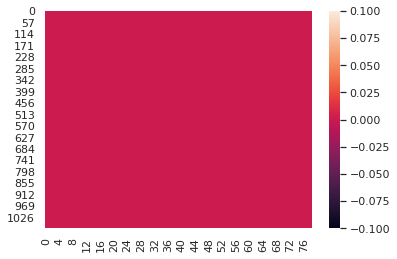

In [269]:
# now that we have our data we need to do a few things to it. One reason this dataset is incompatible with
# sklearn is the presence of NaNs. We are already familiar with one technique to remove them: dropna in
# pandas, and this may in some cases be the best option, but what if that data holds useful information\

# me must first instantiate some type of imputer class, lets use the SimpleImputer for now
imputer = imp.SimpleImputer(missing_values=np.nan, strategy='mean')
# we must then fit it to some type of data, this could be a column, a row, an entire dataframe, etc
imputer.fit(mp_copy)
#now we transform the data
mp_imp = imputer.transform(mp_copy)
plt.show(sb.heatmap(pd.DataFrame(mp_imp).isnull()))

In [270]:
# now we have to transform the dependent variable column
label_encoder_y = sk.preprocessing.LabelEncoder()
classes = label_encoder_y.fit_transform(classes)
classes

array([0, 0, 0, ..., 7, 7, 7])

In [271]:
# now we havve to train, test, and split
mp_train, mp_test, classes_train, classes_test = sk.model_selection.train_test_split(mp_imp, classes, test_size=1/3, random_state=0)

In [272]:
# we must also feature scale our data
sc = sk.preprocessing.StandardScaler()
mp_train = sc.fit_transform(mp_train)
mp_test = sc.fit_transform(mp_test)

In [273]:
from sklearn.ensemble import RandomForestClassifier
# now lets fit a random forest classifier
classifier = RandomForestClassifier(n_estimators=78, criterion='entropy', random_state=0)
classifier.fit(mp_train, classes_train)

y_pred = classifier.predict(mp_test)
scores = sk.model_selection.cross_val_score(classifier, mp_train, classes_train)

print(scores.mean())

0.9833333333333334


<module 'matplotlib.pyplot' from '/home/ryansenne/anaconda3/envs/PyClub/lib/python3.9/site-packages/matplotlib/pyplot.py'>

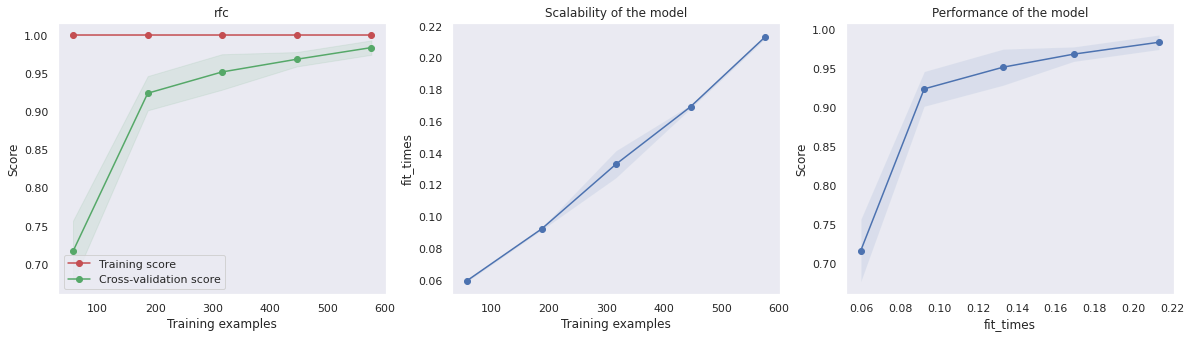

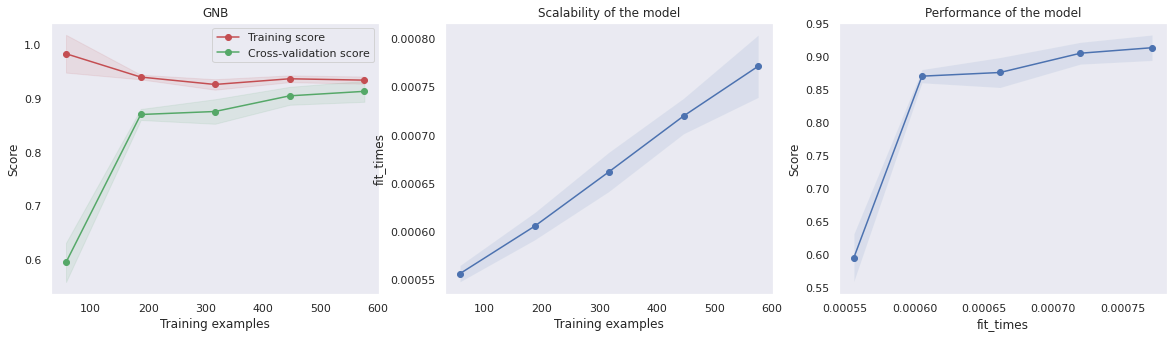

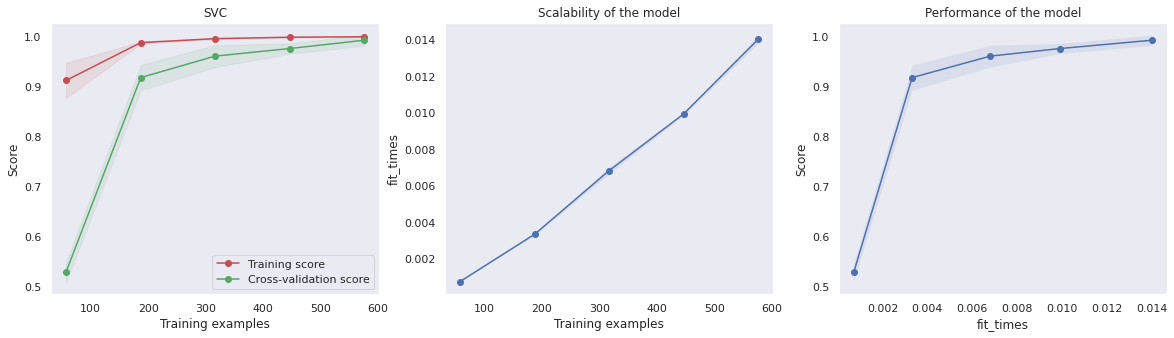

In [274]:
# Source code taken from, scikit learn website, this is not mine

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

classifier2 = GaussianNB()
classifier3 = SVC()

# fig, axes = plt.subplots(3, 3, figsize=(10, 15))
plot_learning_curve(classifier, title = 'rfc', X=mp_train, y=classes_train)
plot_learning_curve(classifier2, title='GNB', X=mp_train, y=classes_train)
plot_learning_curve(classifier3, title='SVC', X=mp_train, y=classes_train)

Ok, now that we've soon how we can create these models, lets look at how we can do some
basic dimensionality reduction techniques, we will be going over the most common technique to this end: PCA. However,
this is not an end all be all and this specific example does not work very well. That's fine, not all datasets are amenable
to every analysis. Some things are linearly separable. Some aren't. That's fine.

In [275]:
# So a huge issue in the world of big data is, how do we visualize data greater than 3 dimensions? The short answer:
# you can't. Let's think about our protein dataset.

mp_2 = pd.read_csv('Data_Cortex_Nuclear.csv')
mp_2.head()

# we have 82 columns, 78 of which are protein information....how the hell are we supposed to visualize a 78 dimensional
# graph? Well, PCA.

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [276]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp2 = IterativeImputer(max_iter=10, random_state=0)
mp_2 = mp_2.iloc[:, 1:20]
imp2.fit(mp_2)
mp_2imp = imp2.transform(mp_2)

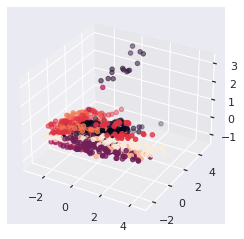

[0.54181845 0.29618051 0.07840904]


In [277]:
# pca-chu I choose you!
# instantiate PCA class
pca3 = sk.decomposition.PCA(n_components=3) 
# reduce that dimensionality!
X = pca3.fit(mp_2imp).transform(mp_2imp)

x_lab = pd.concat([pd.DataFrame(X), pd.DataFrame(classes)], axis=1)
x_lab = x_lab.T.reset_index(drop=True).T

# plot in 3d
sb.set()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_lab[:][0], x_lab[:][1], x_lab[:][2], c=x_lab[:][3])

plt.show()
print(pca3.explained_variance_ratio_)

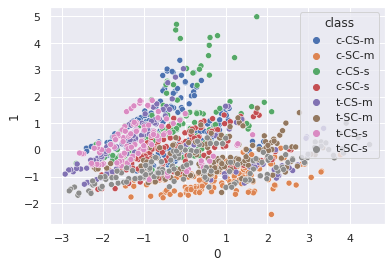

[0.54181845 0.29618051]


In [278]:
# pca-chu I choose you!
pca2 = sk.decomposition.PCA(n_components=2)
X = pca2.fit(mp_2imp).transform(mp_2imp)
classes2 = pd.read_csv('Data_Cortex_Nuclear.csv').iloc[:,-1]
x_lab = pd.concat([pd.DataFrame(X), pd.DataFrame(classes2)], axis=1)


sb.set()
sb.scatterplot(x=0, y=1, hue='class', data=x_lab)
plt.show()
print(pca2.explained_variance_ratio_)

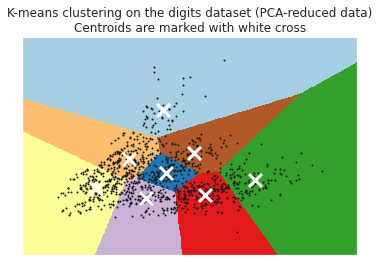

In [279]:
from sklearn.cluster import KMeans
#k-nearest

kmeans = KMeans(init="k-means++", n_clusters=8, n_init=4)
kmeans.fit(X)

# also not mine, shamelessly stolen from sci-kit learn
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Fin.